In [10]:

import sys
sys.path.append('../')

import sys; sys.path.insert(0, '../../') ## make sure path to root of project directory
from wu_barcodes.config import *
from data.wu_data import *

import matplotlib as mpl
# mpl formatting
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl_configs)
import methods.ax_methods as ax_methods
import numpy as np; rnd = np.random.default_rng()
import scipy.stats

In [11]:
import methods.filter_lineages as fl


import scipy.ndimage.filters as ndif
def running_mean_uniform_filter1d(x, N):
    return ndif.uniform_filter1d(x, N, mode='reflect', origin=0)

def calc_coarse_grained_lfc_array(freqs0, D0, freqs1, D1, dt, coarse_grain=100):
    cg_freqs0 = running_mean_uniform_filter1d(freqs0, coarse_grain)
    cg_freqs1 = running_mean_uniform_filter1d(freqs1, coarse_grain)

    cg_f0, cg_f1 = fl.maxmin_freqs(cg_freqs0, D0, cg_freqs1, D1)

    return fl.calc_lfc_array(cg_f0, cg_f1, dt)

def calc_wu_gene_freq_array(bac, diet, mice, t1=4, split_day=1): #assume t0 = 0
    t0_freqs = []
    t1_freqs = []

    t0_reads = fl.bac_input_arrays[bac][(split_day % 2)::2].sum(axis=0)
    t1_reads = fl.bac_read_arrays[bac][ [fl.bac_row_ids[bac][(mouse, t1)] for mouse in mice] ].sum(axis=0)

    print(bac, diet, len(fl.wu_genes[bac][diet]['del']))
    for gene in fl.wu_genes[bac][diet]['del']:
        gene_barcode_indices = fl.bac_gene_meta_dict[bac][gene]['indices']
        if np.any(gene_barcode_indices):
            t0_freqs_g = t0_reads[gene_barcode_indices].sum() / t0_reads.sum()
            t0_freqs.append(t0_freqs_g)

            t1_freqs_g = t1_reads[gene_barcode_indices].sum() / t1_reads.sum()
            t1_freqs.append( t1_freqs_g )

    return  np.array(t0_freqs), np.array(t1_freqs)

def calc_wu_gene_read_array(bac, diet, mice, t1=4, split_day=1): #assume t0 = 0
    t0_freqs = []
    t1_freqs = []

    t0_reads = fl.bac_input_arrays[bac][(split_day % 2)::2].sum(axis=0)
    t1_reads = fl.bac_read_arrays[bac][ [fl.bac_row_ids[bac][(mouse, t1)] for mouse in mice] ].sum(axis=0)

    for gene in wu_genes[bac][diet]:
        gene_barcode_indices = fl.bac_gene_meta_dict[bac][gene]['indices']
        if np.any(gene_barcode_indices):
            t0_freqs_g = t0_reads[gene_barcode_indices].sum()
            t0_freqs.append(t0_freqs_g)

            t1_freqs_g = t1_reads[gene_barcode_indices].sum()
            t1_freqs.append( t1_freqs_g )

    return  np.array(t0_freqs), np.array(t1_freqs)

# def calc_wu_gene_freq_array(bac, diet, mice, t1=4, split_day=1): #assume t0 = 0
#     t0_freqs = []
#     t1_freqs = []
#
#     t0_reads = fl.bac_input_arrays[bac][(split_day % 2)::2].sum(axis=0)
#     t1_reads = fl.bac_read_arrays[bac][ [fl.bac_row_ids[bac][(mouse, t1)] for mouse in mice] ].sum(axis=0)
#
#     for gene in fl.bac_gene_meta_dict[bac].keys():
#         gene_barcode_indices = fl.bac_gene_meta_dict[bac][gene]['indices']
#         if np.any(gene_barcode_indices):
#             t0_freqs_g = t0_reads[gene_barcode_indices].sum() / t0_reads.sum()
#             t0_freqs.append(t0_freqs_g)
#
#             t1_freqs_g = t1_reads[gene_barcode_indices].sum() / t1_reads.sum()
#             t1_freqs.append( t1_freqs_g )
#
#     return  np.array(t0_freqs), np.array(t1_freqs)

def calc_wu_lineage_freq_array(bac, diet, mice, t1=4): #assume t0 = 0
    t0_freqs = []
    t1_freqs = [[] for mouse in mice]
    for gene in wu_genes[bac][diet]:
        gene_barcode_indices = gene_barcode_dict[bac][gene][0]
        if np.any(gene_barcode_indices):
            t0_freqs.extend( freq_dict[bac]['all'][-1][gene_barcode_indices] )
            for m, mouse in enumerate(mice):
                t1_freqs[m].extend(freq_dict[bac]['all'][ MX[(mouse, t1)] ][gene_barcode_indices] )
    return  np.tile(t0_freqs, (len(mice), 1)), np.array(t1_freqs)

BWH2 HF 875


/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt


BWH2 LF 359
Bovatus HF 835


/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt
/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt


Bovatus LF 660
BtVPI HF 587


/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt
/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt


BtVPI LF 293
Bt7330 HF 1539


/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt
/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt
/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt


Bt7330 LF 1161


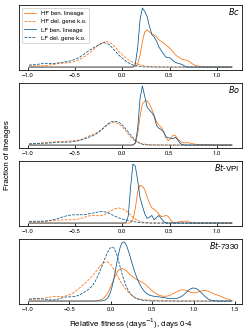

In [12]:
fig = plt.figure(figsize=(4, 5.5))
outer = mpl.gridspec.GridSpec(nrows=4, ncols=1, figure=fig)
outer_ax = fig.add_subplot(outer[:])
outer_ax.set_xlabel('Relative fitness (days$^{-1}$), days 0-4', labelpad=5, fontsize=8)
outer_ax.set_ylabel('Fraction of lineages', labelpad=-2, fontsize=8)
ax_methods.turn_off_ax(outer_ax)

diet = 'HF'
# discovery_mice = [6, 7, 8, 9, 10]
# validation_mice = [1, 2, 3, 5]

discovery_mice = [6, 7, 8, 9, 10]
validation_mice = [1, 2, 3, 5]

cutoff = 10**-6.5
min_reads = 5
discovery_d0 = 0
validation_d0 = 0
discovery_d1 = 4
validation_d1 = 4
discovery_dt = discovery_d1 - discovery_d0
validation_dt = validation_d1 - validation_d0
cg = 100

bac_nfit = {'BWH2':10000, 'BtVPI':5000, 'Bovatus':5000, 'Bt7330':3000}
for b, bac in enumerate(bacteria):
    ax = fig.add_subplot(outer[b])
    for (diet, discovery_mice, validation_mice) in [('HF', [6,7,8,9,10], [1, 2, 3, 5]), ('LF', [11, 12, 13, 15], [16, 18, 19])]:

        wu_t0_discovery, wu_t1_discovery = calc_wu_gene_freq_array(bac, diet, validation_mice, t1=4, split_day=1)
        wu_discovery_lfcs = fl.calc_lfc_array( wu_t0_discovery, wu_t1_discovery, 4)
        # wu_sorted_indices = np.argsort(wu_discovery_lfcs)
        #
        # wu_t0_validate, wu_t1_validate = calc_wu_gene_freq_array(bac, diet, validation_mice, t1=validation_d1, split_day=2)
        # wu_validate_lfcs = fl.calc_lfc_array( wu_t0_validate, wu_t1_validate, validation_d1)

        if 'generate discovery and validation frequencies':
            discovery_reads0, discovery_reads1 = np.copy(fl.get_read_arrays(bac, discovery_mice, discovery_d0, discovery_d1, split_day0=2))
            validation_reads0, validation_reads1 = np.copy(fl.get_read_arrays(bac, validation_mice, validation_d0, validation_d1, split_day0=1))
            # discovery_reads0 -= fl.bac_input_arrays[bac][6][fl.bac_nonwu_indices[bac]]

            discovery_D0, discovery_D1 = discovery_reads0.sum(), discovery_reads1.sum()
            discovery_freqs0, discovery_freqs1 = discovery_reads0 / discovery_D0, discovery_reads1 / discovery_D1

            validation_D0, validation_D1 = validation_reads0.sum(), validation_reads1.sum()
            validation_freqs0, validation_freqs1 = validation_reads0 /validation_D0, validation_reads1 /validation_D1

            d0_reads = fl.bac_read_arrays[bac][0][fl.bac_nonwu_indices[bac]]
            d0_freqs = d0_reads / d0_reads.sum()
            d1_reads = (discovery_reads1 + validation_reads1)

            max_freqs = np.max([discovery_freqs0, discovery_freqs1], axis=0)
            d_valid = fl.filter_lineages(discovery_reads0, discovery_reads1, min_reads=min_reads, threshold=max_freqs)
            v_valid = fl.filter_lineages(validation_reads0, validation_reads1, min_reads=min_reads, threshold=max_freqs)

            filtered_bool =  (d0_freqs > cutoff) * v_valid #* d_valid
            lineage_indices = rnd.permutation( np.arange(d0_freqs.shape[-1])[filtered_bool] )

            d_f0, d_f1 = fl.maxmin_freqs(discovery_freqs0, discovery_D0, discovery_freqs1, discovery_D1)
            v_f0, v_f1 = fl.maxmin_freqs(validation_freqs0, validation_D0, validation_freqs1, validation_D1)

        if 'generate sorted fitnesses':
            n_fit = len(lineage_indices)
            fit_indices, sorted_fitnesses = fl.rank_barcodes(d_f0[lineage_indices], d_f1[lineage_indices], discovery_dt)
            fit_indices = lineage_indices[fit_indices]

            # n_fit = filtered_bool.sum()
            v_f0_fit, v_f1_fit = v_f0[fit_indices][:n_fit], v_f1[fit_indices][:n_fit]
            d_freqs0_fit, d_freqs1_fit = discovery_freqs0[fit_indices][:n_fit], discovery_freqs1[fit_indices][:n_fit]
            v_freqs0_fit, v_freqs1_fit = validation_freqs0[fit_indices][:n_fit], validation_freqs1[fit_indices][:n_fit]
            validation_lfcs = fl.calc_lfc_array(v_f0_fit, v_f1_fit, validation_dt)

            cg_validate_lfcs = calc_coarse_grained_lfc_array(v_freqs0_fit, validation_D0, v_freqs1_fit, validation_D1,
                                                             validation_dt, coarse_grain=cg)

        cg_subset = cg_validate_lfcs[cg//2:bac_nfit[bac]]
        wu_kernel = scipy.stats.gaussian_kde(wu_discovery_lfcs[~wu_discovery_lfcs.mask], bw_method=0.2)
        lineage_kernel = scipy.stats.gaussian_kde(cg_subset[~cg_subset.mask], bw_method=0.2)
        dx = 0.025
        if bac == 'Bt7330':
            x = np.arange(-1.0, 1.5, dx)
        else:
            x = np.arange(-1.0, 1.2, dx )
        x_avg = (x[1:]+x[:-1])/2
        ax.plot(x_avg, wu_kernel(x_avg), color=DIET_COLORS[diet], linestyle='dashed')
        ax.plot(x_avg, lineage_kernel(x_avg), color=DIET_COLORS[diet])
        # ax.plot(wu_discovery_lfcs[wu_sorted_indices])
        # ax.scatter(np.arange(wu_validate_lfcs.shapee[-1]), wu_validate_lfcs[wu_sorted_indices],
        #            s=3, color='violet', label='Wu genes', alpha=0.7, facecolor='none')

    ax.set_yticks([])
    ax.text(0.99, 0.85, BAC_FORMAL_NAMES[bac],
            transform=ax.transAxes, fontsize=8, horizontalalignment='right')
    if bac == 'BWH2':
        legend_markers = [ax_methods.make_marker_obj(linestyle='solid', color=DIET_COLORS['HF']),
                          ax_methods.make_marker_obj(linestyle='dashed', color=DIET_COLORS['HF']),
                          ax_methods.make_marker_obj(linestyle='solid', color=DIET_COLORS['LF']),
                          ax_methods.make_marker_obj(linestyle='dashed', color=DIET_COLORS['LF'])]
        ax.legend(legend_markers, ['HF ben. lineage','HF del. gene k.o.','LF ben. lineage', 'LF del. gene k.o.'], loc=2)

#
#     barcode_indices, sorted_indices, num_barcodes, day0_test = fl.rank_barcodes(bac, 'HL', discovery_mice, 0, discovery_t1, validation_mouse, 4, 4)
#
#
#     bac_cg_map = {'BWH2':12, 'Bovatus': 14, 'BtVPI':14, 'Bt7330':6}
#     # lineage_t0_freqs = freq_dict[bac]['HL'][-1][sorted_indices[:10000]]
#     cg = bac_cg_map[bac]
#     # lineage_t0_freqs = day0_test[sorted_indices[:cg*wu_validate_lfcs.shape[-1]]]
#     lineage_t0_freqs = freq_dict[bac]['HL'][-1][sorted_indices[:cg*wu_validate_lfcs.shape[-1]]]
#     lineage_t1_freqs = freq_dict[bac]['HL'][MX[(validation_mouse, validation_t1)]][sorted_indices[:cg*wu_validate_lfcs.shape[-1]]]
#     lineage_lfcs = calc_coarse_grained_lfc_array(lineage_t0_freqs, lineage_t1_freqs, validation_t1, coarse_grain=cg, pseudofreqs=(0, 0))
#     ax.plot(lineage_lfcs[cg//2::cg], color='blue', label='$\it{de~novo}$\nadaptive lineages', alpha=0.7)
#     ax.legend(loc=1)
#     ax.axhline(0, color='black', linestyle='dashed', zorder=0)
#     ax.set_xlim(0, wu_validate_lfcs.shape[-1])
#     ax.set_ylim(-0.75, 1.75)
#     ax.text(0.2, 0.8, bac_formal_names[bac], transform=ax.transAxes)
#
#     print(lineage_t0_freqs[:cg*wu_validate_lfcs.shape[-1]].sum(), wu_t0_validate.sum())
#     print(num_wu_lineages, cg*wu_validate_lfcs.shape[-1])
#
fig.savefig(f'{biorxiv}/SI_wu_vs_adaptive_lineages_04.pdf')
